Implementing a Neural Network

# 1 PreWork
create a small net and some toy data to check your implementations.

In [2]:
import numpy as np
from nerual_net import TwoLayerNet
input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

net = init_toy_model()
X, y = init_toy_data()

# 2 Forward pass: compute scores

In [3]:
scores = net.loss(X)
print('Your Scores:')
print(scores)

Your Scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]


# 3 Forward pass: compute loss

In [4]:
loss, _ = net.loss(X, y, reg =0.1)
correct_loss = 1.30378789133

print('Different between your loss and corrent loss:')
print(np.sum(np.abs(loss - correct_loss)))

Different between your loss and corrent loss:
1.79856129989e-13


# 4 Train the network

In [5]:
net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=1e-5,
            num_iters=100, verbose=False)
print('final training loss: ', stats['loss_history'][-1])

final training loss:  0.0171496079387


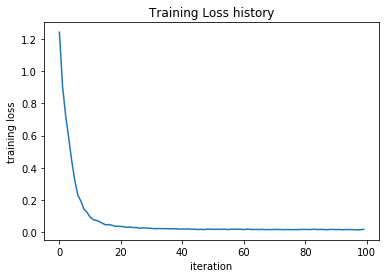

In [6]:
import matplotlib.pyplot as plt
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

# 5 Load the data
Now that you have implemented a two-layer network that passes gradient checks and works on toy data, it's time to load up our favorite CIFAR-10 data so we can use it to train a classifier on a real dataset.

In [7]:
from data_util import load_CIFAR10
def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    X_train, y_train, X_test, y_test = load_CIFAR10()
    mask = range(num_training, num_training + num_validation)
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = range(num_training)
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = range(num_test)
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image

    # Reshape data to rows
    X_train = X_train.reshape(num_training, -1)
    X_val = X_val.reshape(num_validation, -1)
    X_test = X_test.reshape(num_test, -1)

    return X_train, y_train, X_val, y_val, X_test, y_test

X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('validation data shape: ', X_val.shape)
print('validation label shape:', y_val.shape)
print('test data shape: ', X_test.shape)
print('test label shape: ', y_test.shape)

Train data shape:  (49000, 3072)
Train labels shape:  (49000,)
validation data shape:  (1000, 3072)
validation label shape: (1000,)
test data shape:  (1000, 3072)
test label shape:  (1000,)


In [19]:
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)
stats = net.train(X_train, y_train, X_val, y_val,
                 num_iters=1000, batch_size=200,
                 learning_rate=1e-4, learning_rate_decay=0.95,
                 reg=0.5, verbose=False)

In [20]:
val_acc = (net.predict(X_val) == y_val).mean()
print ('Validation accuracy: ', val_acc)

Validation accuracy:  0.277


# 6 Debug the training


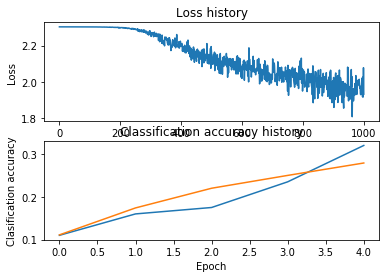

In [21]:
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.show()

# 7 Tune your hyperparameters

In [24]:
best_net = None # store the best model into this 
hidden_size = [75, 100, 125]
results = {}
best_val_acc = 0
best_net = None

learning_rates = np.array([0.7, 0.8, 0.9, 1, 1.1])*1e-3
regularization_strengths = [0.75, 1, 1.25]

print ('running')
for hs in hidden_size:
    for lr in learning_rates:
        for reg in regularization_strengths:
            print ('.')
            net = TwoLayerNet(input_size, hs, num_classes)
            # Train the network
            stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1500, batch_size=200,
            learning_rate=lr, learning_rate_decay=0.95,
            reg= reg, verbose=False)
            val_acc = (net.predict(X_val) == y_val).mean()
            if val_acc > best_val_acc:
                best_val_acc = val_acc
                best_net = net         
            results[(hs,lr,reg)] = val_acc
print("finshed")
# Print out results.
for hs,lr, reg in sorted(results):
    val_acc = results[(hs, lr, reg)]
    print ('hs %d lr %e reg %e val accuracy: %f' % (hs, lr, reg,  val_acc))
    
print ('best validation accuracy achieved during cross-validation: %f' % best_val_acc)

running
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
finshed
hs 75 lr 7.000000e-04 reg 7.500000e-01 val accuracy: 0.474000
hs 75 lr 7.000000e-04 reg 1.000000e+00 val accuracy: 0.475000
hs 75 lr 7.000000e-04 reg 1.250000e+00 val accuracy: 0.482000
hs 75 lr 8.000000e-04 reg 7.500000e-01 val accuracy: 0.480000
hs 75 lr 8.000000e-04 reg 1.000000e+00 val accuracy: 0.504000
hs 75 lr 8.000000e-04 reg 1.250000e+00 val accuracy: 0.473000
hs 75 lr 9.000000e-04 reg 7.500000e-01 val accuracy: 0.470000
hs 75 lr 9.000000e-04 reg 1.000000e+00 val accuracy: 0.477000
hs 75 lr 9.000000e-04 reg 1.250000e+00 val accuracy: 0.479000
hs 75 lr 1.000000e-03 reg 7.500000e-01 val accuracy: 0.476000
hs 75 lr 1.000000e-03 reg 1.000000e+00 val accuracy: 0.483000
hs 75 lr 1.000000e-03 reg 1.250000e+00 val accuracy: 0.482000
hs 75 lr 1.100000e-03 reg 7.500000e-01 val accuracy: 0.499000
hs 75 lr 1.100000e-03 reg 1.000000e+00 val accuracy: 0.488000
hs 75 lr 1.100000e-03 reg 

# 8 Run on the test set

In [25]:
test_acc = (best_net.predict(X_test)==y_test).mean()
print('test accuracy: ', test_acc)

test accuracy:  0.503
